In [169]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [266]:
df = pd.read_csv('dataset/World_Population.csv')

df.shape

/tmp/ipykernel_5418/643321953.py:1: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/World_Population.csv')


(84360, 67)

In [173]:
df.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'],
      dtype='object')

In [175]:
pd.DataFrame({
     'Column': df.columns,
     'Missing Values': df.isnull().sum(),
     'Data Type': df.dtypes
})

,Column,Missing Values,Data Type
SortOrder,SortOrder,35568,float64
LocID,LocID,0,int64
Notes,Notes,72504,object
ISO3_code,ISO3_code,48336,object
ISO2_code,ISO2_code,48488,object
...,...,...,...
Q1560,Q1560,555,float64
Q1560Male,Q1560Male,555,float64
Q1560Female,Q1560Female,555,float64
NetMigrations,NetMigrations,555,float64


In [240]:
data = df[['Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July', 'TPopulationFemale1July', 
    'PopDensity', 'PopSexRatio', 'MedianAgePop', 'NatChange', 'PopGrowthRate',
    'Births', 'CBR', 'TFR', 'NRR', 'SRB', 'Deaths', 'CDR', 
    'LEx', 'InfantDeaths']]
pd.DataFrame({
     'Column': data.columns,
     'Missing Values': data.isnull().sum(),
     'Data Type': data.dtypes
})

,Column,Missing Values,Data Type
Time,Time,0,int64
TPopulation1Jan,TPopulation1Jan,0,float64
TPopulation1July,TPopulation1July,555,float64
TPopulationMale1July,TPopulationMale1July,555,float64
TPopulationFemale1July,TPopulationFemale1July,555,float64
PopDensity,PopDensity,555,float64
PopSexRatio,PopSexRatio,555,float64
MedianAgePop,MedianAgePop,555,float64
NatChange,NatChange,555,float64
PopGrowthRate,PopGrowthRate,555,float64


In [242]:
data = data.dropna()

pd.DataFrame({
     'Column': data.columns,
     'Missing Values': data.isnull().sum(),
     'Data Type': data.dtypes
})

,Column,Missing Values,Data Type
Time,Time,0,int64
TPopulation1Jan,TPopulation1Jan,0,float64
TPopulation1July,TPopulation1July,0,float64
TPopulationMale1July,TPopulationMale1July,0,float64
TPopulationFemale1July,TPopulationFemale1July,0,float64
PopDensity,PopDensity,0,float64
PopSexRatio,PopSexRatio,0,float64
MedianAgePop,MedianAgePop,0,float64
NatChange,NatChange,0,float64
PopGrowthRate,PopGrowthRate,0,float64


In [244]:
data.shape

(83805, 19)

In [246]:
X = data[['Time', 'TPopulation1Jan', 'TPopulationMale1July', 'TPopulationFemale1July', 
    'PopDensity', 'PopSexRatio', 'MedianAgePop', 'NatChange', 'PopGrowthRate',
    'Births', 'CBR', 'TFR', 'NRR', 'SRB', 'Deaths', 'CDR', 
    'LEx', 'InfantDeaths']]
y = data['TPopulation1July']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
X_train.shape

(67044, 18)

In [250]:
X_test.shape

(16761, 18)

In [252]:
correlation_matrix = data.corr()

correlation_matrix

,Time,TPopulation1Jan,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,MedianAgePop,NatChange,PopGrowthRate,Births,CBR,TFR,NRR,SRB,Deaths,CDR,LEx,InfantDeaths
Time,1.000000,0.166426,0.165279,0.164301,0.166252,0.045145,-0.000763,0.725913,-0.160490,-0.572753,0.011763,-0.716878,-0.676028,-0.651014,-0.050793,0.163723,-0.190571,0.756071,-0.244878
TPopulation1Jan,0.166426,1.000000,0.999993,0.999946,0.999964,-0.038180,0.039197,0.075406,0.553452,-0.087150,0.908049,-0.124318,-0.130069,-0.129855,0.070353,0.971429,-0.078974,0.078675,0.435459
TPopulation1July,0.165279,0.999993,1.000000,0.999962,0.999962,-0.038260,0.039357,0.073870,0.556573,-0.085974,0.909539,-0.123112,-0.129073,-0.128811,0.070466,0.971028,-0.079297,0.077411,0.438026
TPopulationMale1July,0.164301,0.999946,0.999962,1.000000,0.999848,-0.038071,0.041352,0.072950,0.558772,-0.085136,0.910485,-0.122175,-0.128207,-0.128038,0.072825,0.970577,-0.079468,0.076674,0.440258
TPopulationFemale1July,0.166252,0.999964,0.999962,0.999848,1.000000,-0.038447,0.037344,0.074791,0.554314,-0.086813,0.908517,-0.124047,-0.129937,-0.129579,0.068082,0.971409,-0.079120,0.078148,0.435743
PopDensity,0.045145,-0.038180,-0.038260,-0.038071,-0.038447,1.000000,-0.032179,0.114534,-0.037221,-0.054122,-0.045085,-0.095885,-0.089335,-0.091441,0.038729,-0.039450,-0.019074,0.117516,-0.040261
PopSexRatio,-0.000763,0.039197,0.039357,0.041352,0.037344,-0.032179,1.000000,-0.119644,0.058252,0.252004,0.054530,0.081301,0.101350,0.122667,0.067582,0.035785,-0.197781,-0.006256,0.067045
MedianAgePop,0.725913,0.075406,0.073870,0.072950,0.074791,0.114534,-0.119644,1.000000,-0.304951,-0.758745,-0.105625,-0.882851,-0.809299,-0.841968,0.183289,0.103869,0.037837,0.858555,-0.275680
NatChange,-0.160490,0.553452,0.556573,0.558772,0.554314,-0.037221,0.058252,-0.304951,1.000000,0.213404,0.833935,0.203296,0.152671,0.164257,0.061729,0.448877,-0.117221,-0.241610,0.806819
PopGrowthRate,-0.572753,-0.087150,-0.085974,-0.085136,-0.086813,-0.054122,0.252004,-0.758745,0.213404,1.000000,0.056755,0.741299,0.706146,0.740693,-0.185900,-0.100476,-0.041121,-0.647999,0.211875


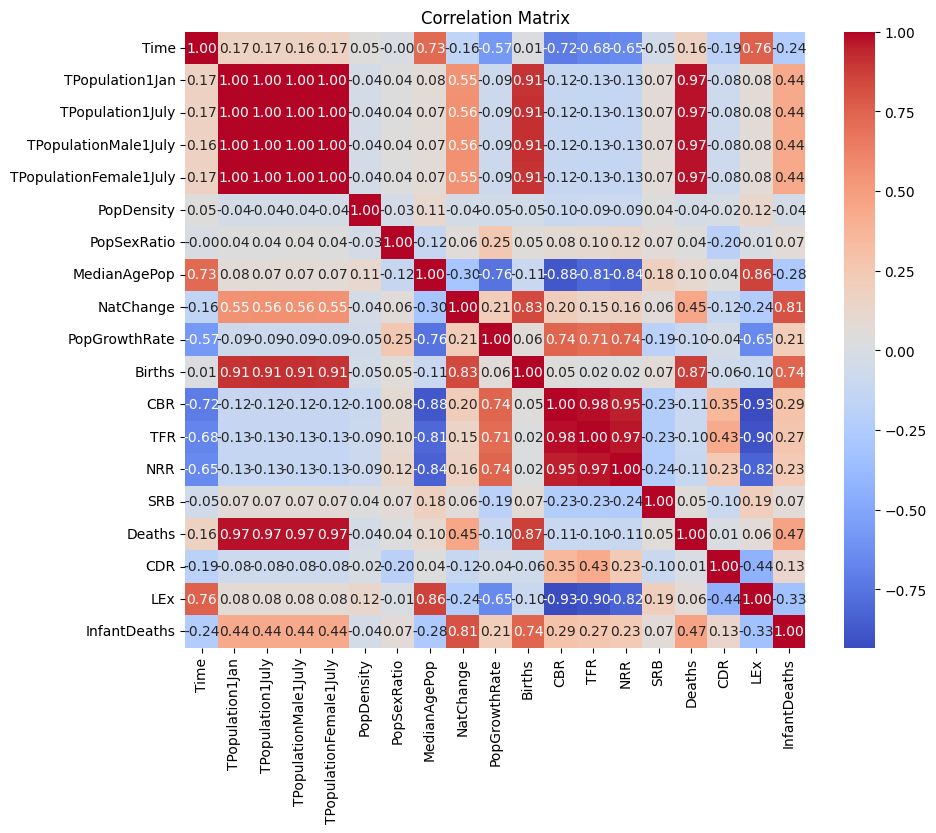

In [254]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [256]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE Squared Error: {mse}")
print(f"R²: {r2}")

MSE Squared Error: 3.743483356296969e-07
R²: 1.0


In [258]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coefficients

,Feature,Coefficient
0,Time,-1.340555e-08
1,TPopulation1Jan,-1.112579e-08
2,TPopulationMale1July,1.000000e+00
3,TPopulationFemale1July,1.000000e+00
4,PopDensity,-2.762151e-10
5,PopSexRatio,-3.011515e-07
6,MedianAgePop,3.374103e-06
7,NatChange,-4.150875e-09
8,PopGrowthRate,7.741124e-07
9,Births,-1.136682e-09


In [260]:
highly_correlated_features = correlation_matrix['TPopulation1July'].abs() >= 0.6

selected_features = correlation_matrix.index[highly_correlated_features].tolist()
selected_features.remove('TPopulation1July')

print("features are: ", selected_features)

features are:  ['TPopulation1Jan', 'TPopulationMale1July', 'TPopulationFemale1July', 'Births', 'Deaths']


['TPopulation1Jan', 'TPopulationMale1July', 'TPopulationFemale1July', 'Births', 'Deaths']


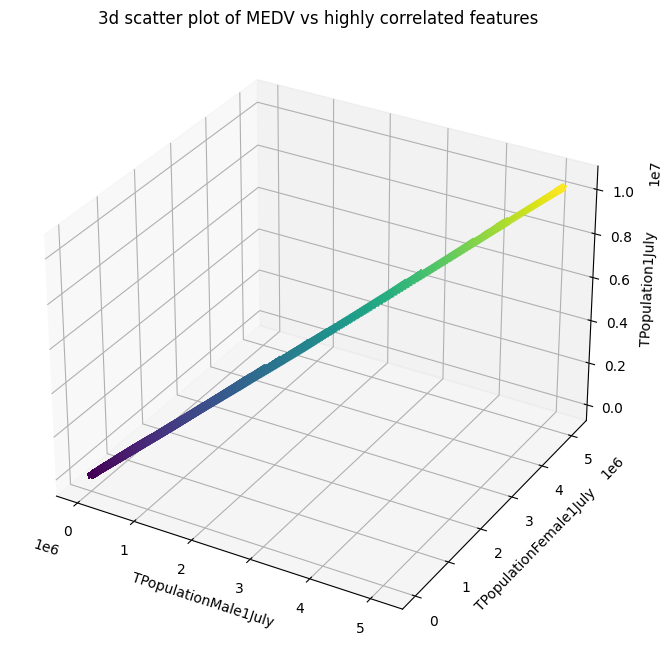

In [321]:
# verify if the selected features represent a linear relationship with the target variable based on 3D plot
feature_1 = selected_features[1]
feature_2 = selected_features[2]
print(selected_features)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[feature_1], data[feature_2], data['TPopulation1July'], c=data['TPopulation1July'], cmap=cm.viridis, marker='*', alpha=0.6)

ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel('TPopulation1July')
ax.set_title('3d scatter plot of MEDV vs highly correlated features')

plt.show()

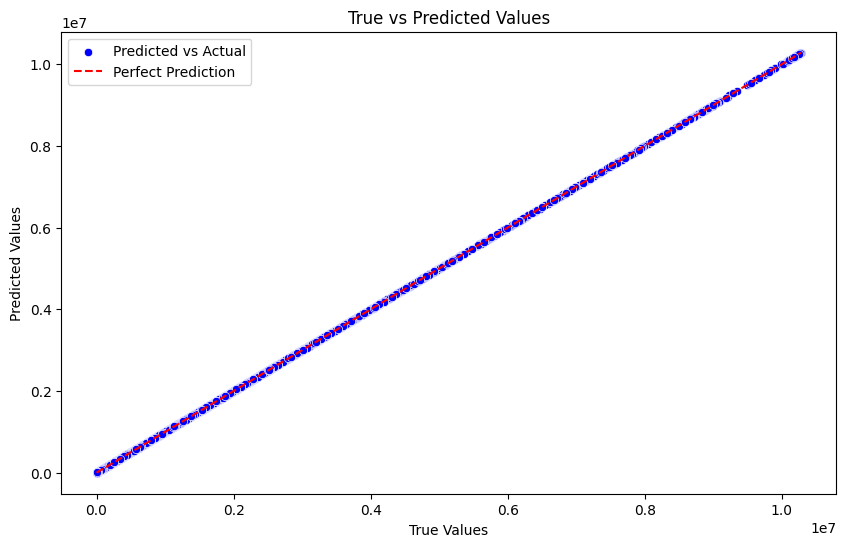

In [319]:
plt.figure(figsize=(10, 6))

# Plot real vs predicted values
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')

# Add a line for perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [302]:
data_with_location = df[['Location', 'TPopulation1July']].merge(data, left_index=False, right_index=False)

In [304]:
data_with_location.columns

Index(['Location', 'TPopulation1July', 'Time', 'TPopulation1Jan',
       'TPopulationMale1July', 'TPopulationFemale1July', 'PopDensity',
       'PopSexRatio', 'MedianAgePop', 'NatChange', 'PopGrowthRate', 'Births',
       'CBR', 'TFR', 'NRR', 'SRB', 'Deaths', 'CDR', 'LEx', 'InfantDeaths'],
      dtype='object')

In [306]:
random_samples = data_with_location.sample(n=30, random_state=42)

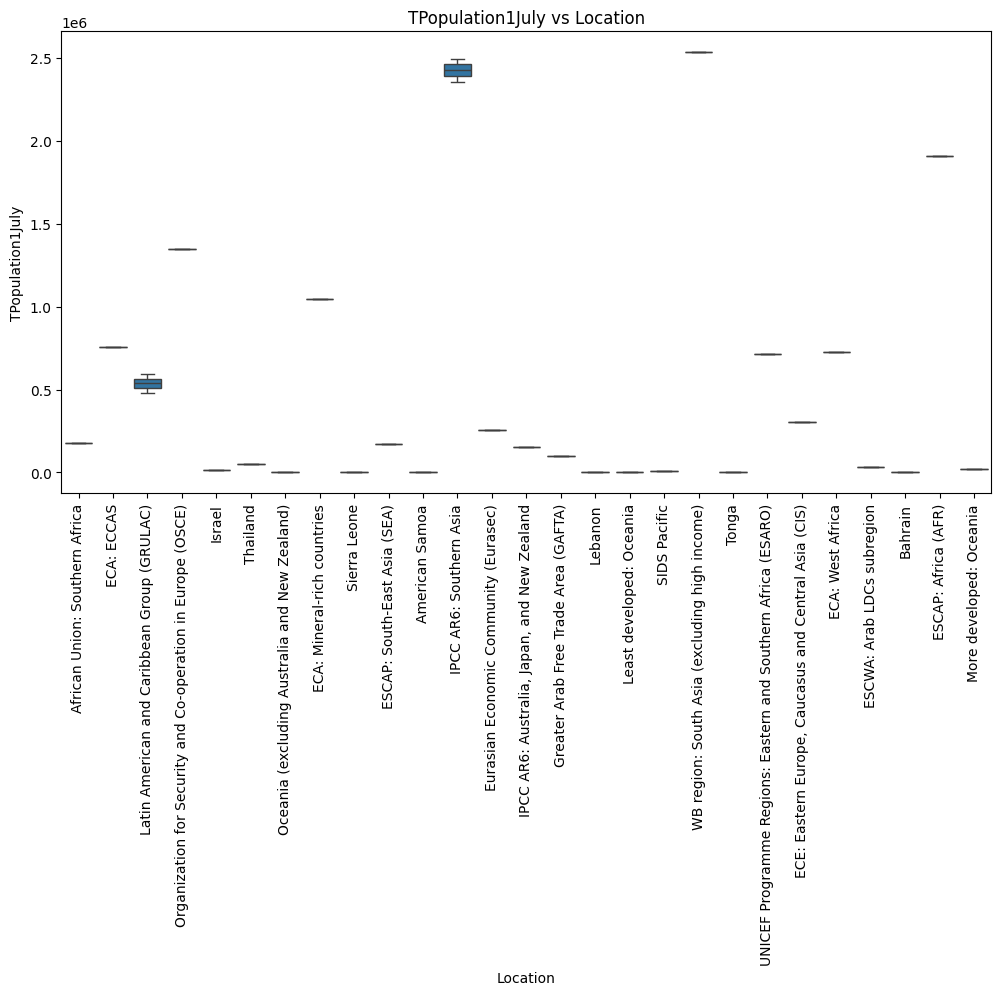

In [308]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='TPopulation1July', data=random_samples)
plt.xticks(rotation=90) 
plt.title('TPopulation1July vs Location')
plt.xlabel('Location')
plt.ylabel('TPopulation1July')
plt.show()